In [108]:
def abrindoArquivos(): #Deve-se selecionar um arquivo .zip que contenha apenas arquivos PDF.
    from tika import parser #Package utilizada pra extrair o conteúdo de cada PDF em forma de string
    import zipfile #Package utilizado para extrair arquivos de um .zip
    import os #Package utilizado para remover arquivos extraídos do .zip
    from tkinter import Tk #Package que contém GUI, em forma de janela, para selecionar arquivos como entrada.
    from tkinter.filedialog import askopenfilename #Recurso de diálogo de arquivos
    
    Tk().withdraw() #não abrirá uma full GUI, dessa forma queremos a janela raiz oculta.
    
    lista = []
    #A linha a seguir vai pedir para o usuário selecionar um arquivo .zip, instanciando na memória
    arquivo = zipfile.ZipFile(askopenfilename(initialdir = "/Desktop",title = "Select file",filetypes = (("zip files","*.zip"),("all files","*.*"))), 'r')

    for i in sorted(arquivo.namelist()):
        print(i, end=', ') #Printa o atual arquivo, necessário para garantir que os arquivos estão sendo abertos na ordem.
        lista.append(parser.from_file(arquivo.extract(i))['content']) #Adiciona a lista o conteúdo do arquivo extraído.
        os.remove(arquivo.extract(i)) #Deleta do ambiente o arquivo extraído.
    
    
    arquivo.close() #Desinstancia o .zip
    
    return lista

def filtragem(lista, stopWords = True, impureza = True):
   
    import nltk
    from nltk.corpus import stopwords #Pacote para Stopwords
    import re #Pacote utilziado para substituição de caracteres em uma string
    from unidecode import unidecode #Pacote para remover acentos
    
    listaFiltrada = []
    for rawData in lista:listaFiltrada.append(rawData)
        
    stop_words_sem_acento = stopwords.words('portuguese')
    stop_words_sem_acento = [unidecode(p) for p in stop_words_sem_acento ]
    
    for j in range(len(listaFiltrada)):
        
        listaFiltrada[j] = listaFiltrada[j].lower() #Coloca toda a ata em letra minúscula
        listaFiltrada[j] = unidecode(listaFiltrada[j]) #Remoção de acentos
        listaFiltrada[j] =  re.sub(r'[\W_]|\d+', ' ', listaFiltrada[j]) #Remove todos os cacractes alfanuméricos e númericos
        listaFiltrada[j] =  nltk.word_tokenize(listaFiltrada[j]) #Transforma um texto corrido em uma lista de string, similar ao processo list.split()
        
        if stopWords : 
            listaFiltrada[j] = [a for a in listaFiltrada[j] if a not in stop_words_sem_acento] #StopWords
            
    if impureza : #Impurezas
        for i in range(len(listaFiltrada)):
            listaFiltrada[i] = [a for a in listaFiltrada[i] if a not in ['br','oi','www','tri', 'ri']]
    
    for i in range(len(listaFiltrada)):
         listaFiltrada[i] = [a for a in listaFiltrada[i] if len(a) > 1]
    
    return listaFiltrada

In [109]:
import nltk #Pacote para tratamento de palavras
# Checar sempre a versão do java se der problema com o código abaixo
base_dados = abrindoArquivos()

001.pdf, 002.pdf, 003.pdf, 004.pdf, 005.pdf, 006.pdf, 007.pdf, 008.pdf, 009.pdf, 010.pdf, 011.pdf, 012.pdf, 013.pdf, 014.pdf, 015.pdf, 016.pdf, 017.pdf, 018.pdf, 019.pdf, 020.pdf, 021.pdf, 022.pdf, 023.pdf, 024.pdf, 025.pdf, 026.pdf, 027.pdf, 028.pdf, 

In [110]:
len(base_dados)

28

# Dicionário Professora Doutora Daniela

In [19]:
def prepara_dicionario(arquivo):
    with open(arquivo, 'r') as file:
        lista = file.readlines()    
    return lista

In [23]:
lista_palavras_positivas = prepara_dicionario('dicionario_positivas_final.txt')
lista_palavras_positivas = [palavra.replace('\n','') for palavra in lista_palavras_positivas]
lista_palavras_negativas = prepara_dicionario('dicionario_negativas_final.txt')
lista_palavras_negativas = [palavra.replace('\n','') for palavra in lista_palavras_negativas]
vocabulario = lista_palavras_negativas.copy() + lista_palavras_positivas.copy()

In [26]:
len(lista_palavras_negativas)

3152

In [27]:
len(lista_palavras_positivas)

1425

In [28]:
len(vocabulario)

4577

# Preparando base de dados

In [162]:
# Quantidade de palavras antes da estruturação da base de dados
len(base_dados[0])

59827

In [112]:
# Filtragem
base_dados_filtrada = filtragem(base_dados)

In [155]:
# Quantidade de palavras após a estruturação da base de dados
len(base_dados_filtrada[0])

4403

In [197]:
import pickle
with open("base_filtrada.txt", "wb") as fp:   #Pickling
    pickle.dump(base_dados_filtrada, fp)

In [196]:
# Base original
with open("base_dados.txt", "wb") as fp:   #Pickling
    pickle.dump(base_dados, fp)

In [193]:

with open("base_filtrada.txt", "rb") as fp:   # Unpickling
    teste = pickle.load(fp)

len(teste[0])

4403

In [153]:
len(teste[0])

4403

# Visualizando as informações do corpus

In [114]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nuvem_sem_filtrar = ''
nuvem_com_filtrar = ''

for i in range(len(base_dados)):
    nuvem_sem_filtrar = nuvem_sem_filtrar + base_dados[i].lower()
    nuvem_com_filtrar = nuvem_com_filtrar + ' '.join(base_dados_filtrada[i])

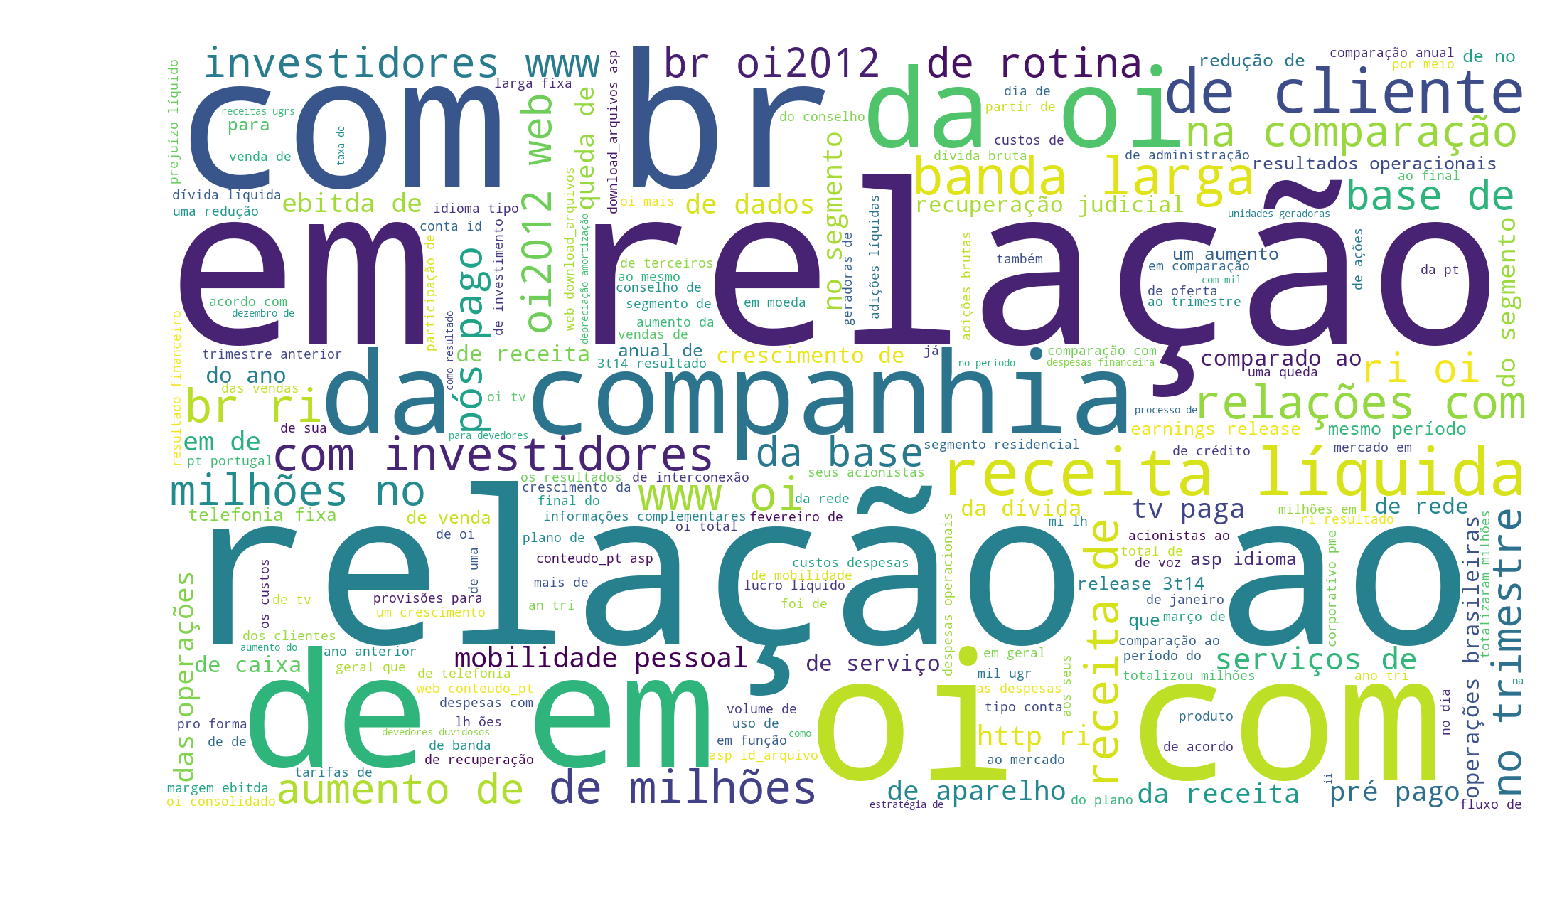

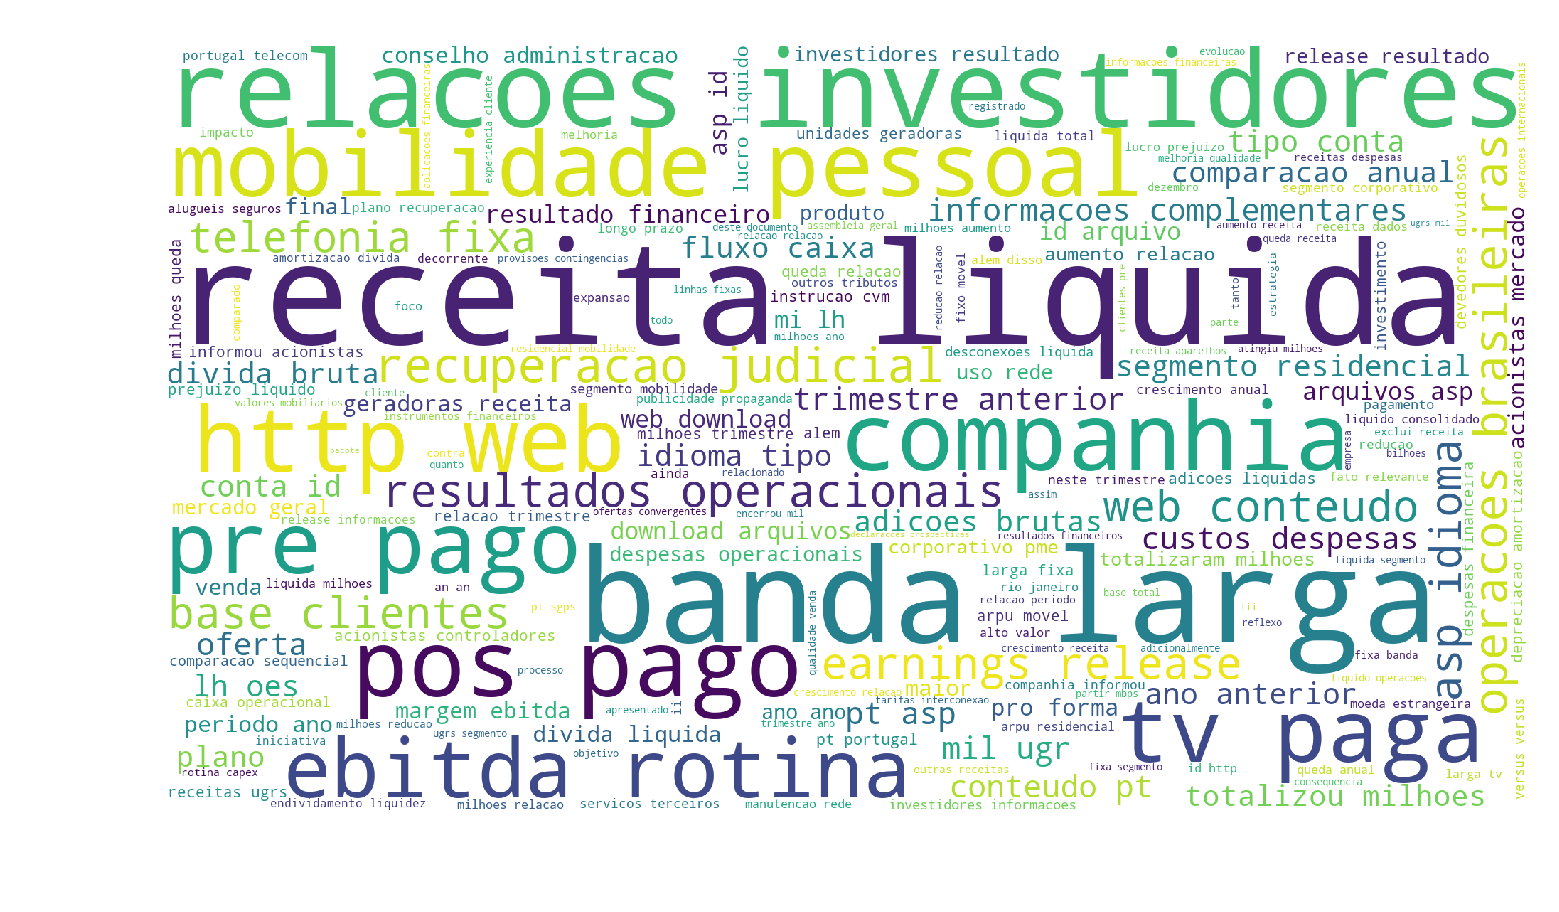

In [199]:
wordcloud = WordCloud(width = 1920, height = 1080, stopwords=[],background_color ='white', min_font_size = 10, random_state=1).generate(nuvem_sem_filtrar) 
wordcloud2 = WordCloud(width = 1920, height = 1080, stopwords=[],background_color ='white', min_font_size = 10, random_state=1).generate(nuvem_com_filtrar) 

plt.figure(figsize = (5, 5), facecolor = None, dpi = 300) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 


plt.figure(figsize = (5, 5), facecolor = None, dpi = 300)  
plt.imshow(wordcloud2)
plt.axis("off") 
plt.tight_layout(pad = 0) 

wordcloud.to_file('nuvem1.png')
wordcloud2.to_file('nuvem2.png')

# Preparando o sentimento

In [116]:
base_dados_filtrada_vocabulario = base_dados_filtrada.copy()

for i in range(len(base_dados_filtrada)):
    base_dados_filtrada_vocabulario[i] = [palavra for palavra in base_dados_filtrada_vocabulario[i] if palavra in vocabulario]

In [117]:
def computa_ocorrencia_palavra_doc(nome, base_dados):
    ocorrencia_da_palavra_nos_doc = 0

    for dic in base_dados:
        if nome in dic:
            ocorrencia_da_palavra_nos_doc += 1
    
    return ocorrencia_da_palavra_nos_doc

In [118]:
#lembrar que os logs são na base 2

base_dados_ocorrencia_vocab = []
for i in range(len(base_dados_filtrada_vocabulario)):
    dicionario_frequencia = {}
    for palavra in base_dados_filtrada_vocabulario[i]:
        if palavra not in dicionario_frequencia:
            dicionario_frequencia[palavra] = 1
        else:
            dicionario_frequencia[palavra] += 1
    base_dados_ocorrencia_vocab.append(dicionario_frequencia)

In [120]:
import numpy as np 

peso_das_palavras = []

for i in range(len(base_dados_filtrada)):
    dic_pesagem = {}
    for nome,valor in base_dados_ocorrencia_vocab[i].items():
        ocorrencia_da_palavra_nos_doc = computa_ocorrencia_palavra_doc(nome,  base_dados_ocorrencia_vocab)
        peso = ( (1+np.log2(valor)) / (1 + np.log2(len(base_dados_filtrada[i])/len(base_dados_filtrada_vocabulario))) ) * np.log2(len(base_dados_filtrada_vocabulario)/ocorrencia_da_palavra_nos_doc)
        dic_pesagem[nome] = peso
    peso_das_palavras.append(dic_pesagem)

In [121]:
sentimento = []

for i in range(len(base_dados)):
    soma_positivo = 0
    soma_negativo = 0
    
    for nome, valor in peso_das_palavras[i].items():
        if nome in lista_palavras_negativas:
            soma_negativo += valor
        else:
            soma_positivo += valor
    sent = (soma_positivo - soma_negativo)/(soma_positivo + soma_negativo)
    sentimento.append(sent)

In [137]:
import pandas as pd
indicador = pd.DataFrame( index=pd.date_range(start='1/1/2012', end='01/01/2019', freq='Q')) 
indicador['sentimentoBC'] = sentimento

In [138]:
indicador.head()

,sentimentoBC
2012-03-31,0.402084
2012-06-30,0.658765
2012-09-30,0.583458
2012-12-31,0.648214
2013-03-31,0.637728


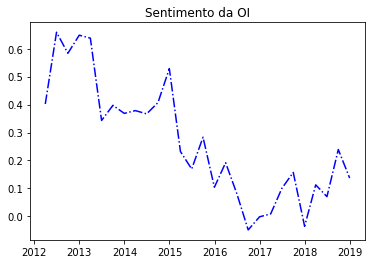

In [276]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_title('Sentimento da OI')
ax.plot(indicador.index,indicador.values, 'b-.')

## Comparando o sentimento com os resultados operacionais

In [222]:
oi_operacional = pd.read_excel("oi_operacional.xlsx", index_col=0)
tempo_medio_resolucao = pd.read_csv('tempo_medio_trimestral.csv')

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [227]:
oi_operacional['sentimento'] = indicador['sentimentoBC'].values
oi_operacional['diff_aber_arq'] = tempo_medio_resolucao['tempo_medio_resolucao'].values

In [230]:
oi_operacional.head()

,receita_liquida,custo_operacionais,receitas_financeiras,despesas_financeiros,lucro_liquido,sentimento,diff_aber_arq
data,,,,,,,
2012-01-01,3829.4,-2679.8,574.0,3810.6,345.8,0.402084,323.505603
2012-04-01,6909.3,-4768.8,943.0,-1634.8,64.1,0.658765,266.591966
2012-07-01,7040.6,-4855.0,443.4,-997.0,314.6,0.583458,220.069713
2012-10-01,7389.9,-4927.0,315.0,-1048.4,113.0,0.648214,191.417508
2013-01-01,7041.2,-4890.2,275.3,-1035.7,262.3,0.637728,178.184683


In [261]:
oi_operacional.to_csv('oi_operacional_completo.csv')

In [234]:
oi_operacional.corr()

,receita_liquida,custo_operacionais,receitas_financeiras,despesas_financeiros,lucro_liquido,sentimento,diff_aber_arq
receita_liquida,1.000000,-0.000354,-0.230687,-0.299079,-0.091240,0.422605,0.089724
custo_operacionais,-0.000354,1.000000,0.081908,0.136103,0.284275,0.313072,0.408029
receitas_financeiras,-0.230687,0.081908,1.000000,0.213993,0.934439,-0.192821,-0.156720
despesas_financeiros,-0.299079,0.136103,0.213993,1.000000,0.386643,0.257235,0.476665
lucro_liquido,-0.091240,0.284275,0.934439,0.386643,1.000000,0.002107,0.038450
sentimento,0.422605,0.313072,-0.192821,0.257235,0.002107,1.000000,0.687642
diff_aber_arq,0.089724,0.408029,-0.156720,0.476665,0.038450,0.687642,1.000000


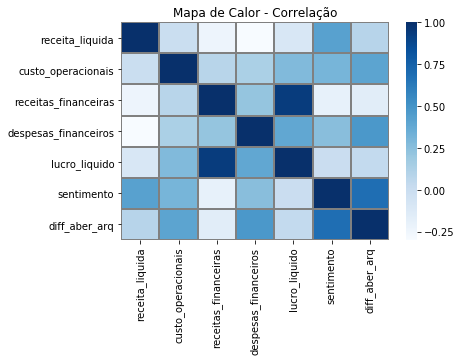

In [268]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig

ax = plt.axes()
fig = sns.heatmap(oi_operacional.corr(), cmap='Blues', linecolor = 'gray', linewidths=1)
ax.set_title('Mapa de Calor - Correlação')
fig = fig.get_figure()    
fig.savefig('heatmap_oi.png', dpi=400,bbox_inches = "tight")

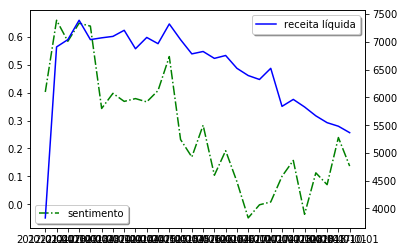

In [281]:
fig, ax = plt.subplots()
plt.plot(oi_operacional['sentimento'], '-.g', label='sentimento')
plt.legend(loc='lower left', shadow=True)
ax.tick_params('vals', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(oi_operacional['receita_liquida'], '-b', label='receita líquida')
plt.legend(loc='upper right', shadow=True)
ax.tick_params('vals', colors='b')

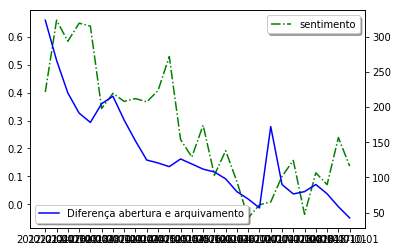

In [279]:
fig, ax = plt.subplots()
plt.plot( oi_operacional['sentimento'], '-.g', label='sentimento')
plt.legend(loc='best', shadow=True)
ax.tick_params('vals', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(oi_operacional['diff_aber_arq'], '-b', label='Diferença abertura e arquivamento')
plt.legend(loc='lower left', shadow=True)
ax.tick_params('vals', colors='b')

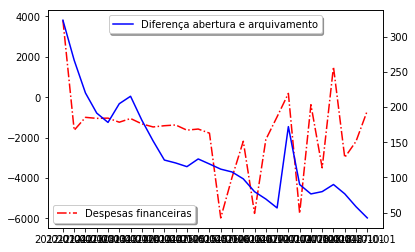

In [282]:
fig, ax = plt.subplots()
plt.plot(oi_operacional['despesas_financeiros'], '-.r', label='Despesas financeiras')
plt.legend(loc='lower left', shadow=True)
ax.tick_params('vals', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(oi_operacional['diff_aber_arq'], '-b', label='Diferença abertura e arquivamento')
plt.legend(loc='upper center', shadow=True)
ax.tick_params('vals', colors='b')

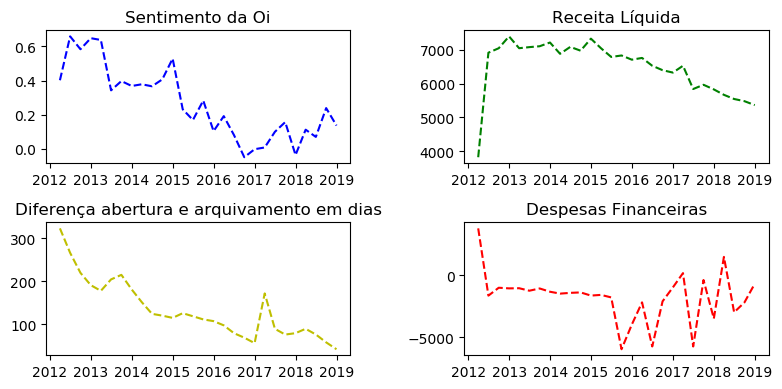

In [288]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100, nrows=2, ncols=2)
ax[0][0].set_title('Sentimento da Oi')
ax[0][0].plot(indicador.index,oi_operacional['sentimento'], 'b--')
ax[0][1].set_title('Receita Líquida')
ax[0][1].plot(indicador.index,oi_operacional['receita_liquida'], 'g--')
ax[1][0].set_title('Diferença abertura e arquivamento em dias')
ax[1][0].plot(indicador.index,oi_operacional['diff_aber_arq'], 'y--')
ax[1][1].set_title('Despesas Financeiras')
ax[1][1].plot(indicador.index,oi_operacional['despesas_financeiros'], 'r--')

plt.tight_layout() # Organiza o espaço
#fig.savefig('imagem.png')

In [285]:
indicador.index

DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [249]:
## Regressão de leve

In [250]:
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [258]:
reg = sm.ols(formula='receita_liquida ~ sentimento + diff_aber_arq', data=oi_operacional).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        receita_liquida   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     4.282
Date:                Mon, 30 Mar 2020   Prob (F-statistic):             0.0252
Time:                        22:30:45   Log-Likelihood:                -222.01
No. Observations:                  28   AIC:                             450.0
Df Residuals:                      25   BIC:                             454.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6386.4221    300.364     21.262

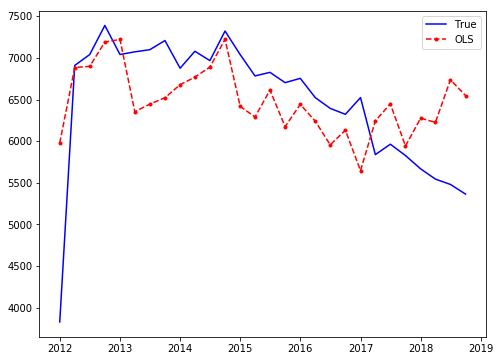

In [260]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(reg)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(oi_operacional.index, oi_operacional['receita_liquida'], 'b-', label="True")
ax.plot(oi_operacional.index, reg.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
fig.savefig('previ_dentro')